# Example

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Example dataset
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD'],
    'Age': [18, 25, 32, 40],
    'Income': [20000, 35000, 50000, 80000]
})

print("Original DataFrame:")
print(df)

Original DataFrame:
   Gender    Education  Age  Income
0    Male  High School   18   20000
1  Female     Bachelor   25   35000
2  Female       Master   32   50000
3    Male          PhD   40   80000


In [2]:
# --- Encoding ---
# Label Encoding (Education with order)
edu_order = {'High School':1, 'Bachelor':2, 'Master':3, 'PhD':4}
df['Education_encoded'] = df['Education'].map(edu_order)
print("\nDataFrame after Label Encoding (Education):")
print(df)


DataFrame after Label Encoding (Education):
   Gender    Education  Age  Income  Education_encoded
0    Male  High School   18   20000                  1
1  Female     Bachelor   25   35000                  2
2  Female       Master   32   50000                  3
3    Male          PhD   40   80000                  4


In [3]:
# One-Hot Encoding (Gender)
df = pd.get_dummies(df, columns=['Gender'])
print("\nDataFrame after One-Hot Encoding")
print(df)


DataFrame after One-Hot Encoding
     Education  Age  Income  Education_encoded  Gender_Female  Gender_Male
0  High School   18   20000                  1          False         True
1     Bachelor   25   35000                  2           True        False
2       Master   32   50000                  3           True        False
3          PhD   40   80000                  4          False         True


In [4]:
# --- Normalization ---
scaler = MinMaxScaler()
df['Age_norm'] = scaler.fit_transform(df[['Age']])
print("\nDataFrame after Normalization (Age):")
print(df)


DataFrame after Normalization (Age):
     Education  Age  Income  Education_encoded  Gender_Female  Gender_Male  \
0  High School   18   20000                  1          False         True   
1     Bachelor   25   35000                  2           True        False   
2       Master   32   50000                  3           True        False   
3          PhD   40   80000                  4          False         True   

   Age_norm  
0  0.000000  
1  0.318182  
2  0.636364  
3  1.000000  


In [5]:
# --- Standardization ---
scaler_std = StandardScaler()
df['Income_std'] = scaler_std.fit_transform(df[['Income']])
print("\nDataFrame after Standardization (Income):")
print(df)


DataFrame after Standardization (Income):
     Education  Age  Income  Education_encoded  Gender_Female  Gender_Male  \
0  High School   18   20000                  1          False         True   
1     Bachelor   25   35000                  2           True        False   
2       Master   32   50000                  3           True        False   
3          PhD   40   80000                  4          False         True   

   Age_norm  Income_std  
0  0.000000   -1.183216  
1  0.318182   -0.507093  
2  0.636364    0.169031  
3  1.000000    1.521278  


In [6]:
print("\nTransformed DataFrame:")
print(df)


Transformed DataFrame:
     Education  Age  Income  Education_encoded  Gender_Female  Gender_Male  \
0  High School   18   20000                  1          False         True   
1     Bachelor   25   35000                  2           True        False   
2       Master   32   50000                  3           True        False   
3          PhD   40   80000                  4          False         True   

   Age_norm  Income_std  
0  0.000000   -1.183216  
1  0.318182   -0.507093  
2  0.636364    0.169031  
3  1.000000    1.521278  


# Tasks 
Load the Titanic dataset (or another dataset with categorical + numerical features).
- Apply label encoding to Sex.
- Apply one-hot encoding to Embarked.
- Normalize the Age column.
- Standardize the Fare column.
- Compare the effect of normalization vs. standardization on a small dataset with highly varying scales. Visualize distributions before and after.

In [8]:
# Loading the Titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("\nTitanic DataFrame:")
titanic_df.head()


Titanic DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# applying label encoding to sex 
label_encoder = LabelEncoder()
titanic_df['Sex_encoded'] = label_encoder.fit_transform(titanic_df['Sex'])
print("\nTitanic DataFrame after Label Encoding")
titanic_df.head()


Titanic DataFrame after Label Encoding


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
# normalizing Age
titanic_df['Age_norm'] = scaler.fit_transform(titanic_df[['Age']])
print("\nTitanic DataFrame after Normalization (Age):")
titanic_df.head(10)


Titanic DataFrame after Normalization (Age):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Age_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.434531
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0.673285
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0.019854
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0.334004
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0.170646


In [13]:
# standardizing Fare
titanic_df['Fare_std'] = scaler_std.fit_transform(titanic_df[['Fare']])
print("\nTitanic DataFrame after Standardization (Fare):")
titanic_df.head(10)


Titanic DataFrame after Standardization (Fare):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Age_norm,Fare_std
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.434531,-0.486337
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,NaN,-0.478116
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0.673285,0.395814
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0.019854,-0.224083
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0.334004,-0.424256
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0.170646,-0.042956


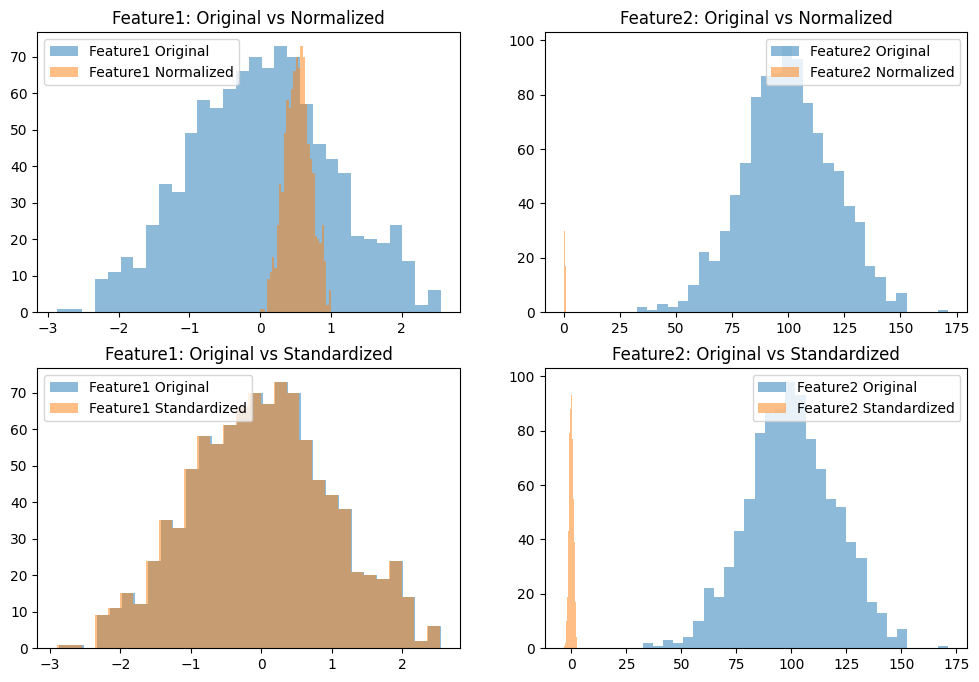

In [18]:
# Compare the effect of normalization vs. standardization on a small dataset with highly varying scales 
import numpy as np
import matplotlib.pyplot as plt
# Create a small dataset with varying scales
data = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),  # Normal distribution
    'Feature2': np.random.normal(100, 20, 1000)  # Different scale
})
# Normalize and standardize the dataset
data['Feature1_norm'] = scaler.fit_transform(data[['Feature1']])
data['Feature2_norm'] = scaler.fit_transform(data[['Feature2']])
data['Feature1_std'] = scaler_std.fit_transform(data[['Feature1']])
data['Feature2_std'] = scaler_std.fit_transform(data[['Feature2']])
# Plotting the distributions before and after normalization and standardization
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(data['Feature1'], bins=30, alpha=0.5, label='Feature1 Original')
plt.hist(data['Feature1_norm'], bins=30, alpha=0.5, label   ='Feature1 Normalized')
plt.title('Feature1: Original vs Normalized')       
plt.legend()
plt.subplot(2, 2, 2)
plt.hist(data['Feature2'], bins=30, alpha=0.5, label='Feature2 Original')
plt.hist(data['Feature2_norm'], bins=30, alpha=0.5, label='Feature2 Normalized')
plt.title('Feature2: Original vs Normalized')
plt.legend()
plt.subplot(2, 2, 3)
plt.hist(data['Feature1'], bins=30, alpha=0.5, label='Feature1 Original')
plt.hist(data['Feature1_std'], bins=30, alpha=0.5, label='Feature1 Standardized')
plt.title('Feature1: Original vs Standardized')
plt.legend()
plt.subplot(2, 2, 4)    
plt.hist(data['Feature2'], bins=30, alpha=0.5, label='Feature2 Original')
plt.hist(data['Feature2_std'], bins=30, alpha=0.5, label='Feature2 Standardized')
plt.title('Feature2: Original vs Standardized') 
plt.legend()

**Normalization preserves the shape but rescales values to a bounded interval.**

Normalization is very helpful when features have different ranges (like Feature1 `~[-3,3]` vs Feature2 `~[0,175]`). After normalization, both are in the same scale, which avoids one feature dominating the model.

For features already close to mean=0 and std=1, standardization barely changes them. Standardization is useful when the distribution matters (e.g., regression, SVM). It makes features comparable by centering them, even if their original ranges were very different.
